In [29]:
from collections import deque
from copy import copy

import matplotlib.pyplot as plt
import numpy as np
from imutils.object_detection import non_max_suppression
from matplotlib.patches import Rectangle

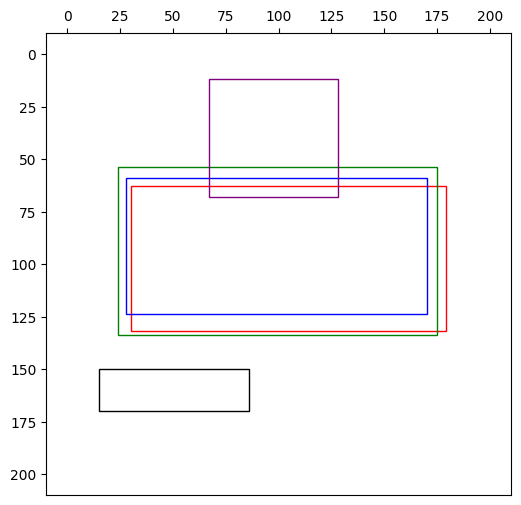

In [30]:
bboxes = np.array(
    [
        [30, 63, 179, 132],  # x1, y1, x2, y2
        [28, 59, 170, 124],
        [24, 54, 175, 134],
        [67, 12, 128, 68],
        [15, 150, 86, 170],
    ]
)
widths_heights = bboxes[:, 2:] - bboxes[:, :2]
scores = np.array((0.85, 0.88, 0.97, 0.78, 0.75))
colors = np.array(("red", "blue", "green", "purple", "black"))

plt.figure(figsize=(6, 6))

for bbox, (width, height), color in zip(bboxes, widths_heights, colors):
    plt.gca().add_patch(Rectangle(bbox[:2], width, height, color=color, fill=False))  # type: ignore

plt.xlim(-10, 210)
plt.ylim(-10, 210)
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.show()

In [31]:
def iou(bbox_a, bbox_b):
    bbox_a, bbox_b = np.asarray(bbox_a, dtype=np.float32), np.asarray(bbox_b, dtype=np.float32)
    if not (bbox_a.size == 4 and bbox_b.size == 4):
        raise ValueError("'bbox_a' and 'bbox_b' should be 4-element arrays")

    x_left = max(bbox_a[0], bbox_b[0])
    x_right = min(bbox_a[2], bbox_b[2])
    y_bottom = max(bbox_a[1], bbox_b[1])
    y_top = min(bbox_a[3], bbox_b[3])

    if intersect_area := max(0, x_right - x_left) * max(0, y_top - y_bottom):
        bbox_a_area = np.prod(bbox_a[2:] - bbox_a[:2])
        bbox_b_area = np.prod(bbox_b[2:] - bbox_b[:2])
        return intersect_area / (bbox_a_area + bbox_b_area - intersect_area)  # type: ignore

    return 0.0

In [32]:
iou(bboxes[0], bboxes[1])

0.7784158

In [33]:
def non_maximum_suppression(bboxes, scores, overlap_thresh=0.3):
    bboxes = np.asarray(bboxes)
    scores = deque(np.argsort(scores), maxlen=len(scores))
    non_overlap = deque(maxlen=len(scores))

    while scores:
        si = scores.pop()
        non_overlap.append(si)

        for sj in copy(scores):
            if iou(bboxes[si], bboxes[sj]) > overlap_thresh:
                scores.pop()

    return bboxes[non_overlap]

In [34]:
nms_bboxes = non_maximum_suppression(bboxes, scores, overlap_thresh=0.3)
nms_bboxes

array([[ 24,  54, 175, 134],
       [ 67,  12, 128,  68],
       [ 15, 150,  86, 170]])

In [35]:
nms_boxes = non_max_suppression(bboxes, scores, overlapThresh=0.3)
nms_boxes

array([[ 24,  54, 175, 134],
       [ 67,  12, 128,  68],
       [ 15, 150,  86, 170]])